# Chemical Synapse Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
S0 = 1000
S_max = 100000
V_Deg = 100
V_Uptake = 1000
U0 = -70
U_spike = 30
U_R_2 = 0.05
U_R_3 = 0.1
U_R_4 = 0.13
P_R_2 = 0.6
P_R_3 = 0.71
P_R_4 = 0.97
T = 10
R_abs = 1500

## Model

In [3]:
class Model:
    def __init__(self, v_rel, xyz, max_t=(T * (10 ** 3)), step=5):
        self.v_rel = v_rel
        if abs(sum(xyz)) != R_abs:
            raise ValueError('`xyz` should sum up to `R_abs` in absolute value.')
        self.x, self.y, self.z = xyz
        
        u, data = U0, []
        for t in range(0, max_t, step):
            values_t = self._step(u, t, step)
            
            values_t['t'] = t
            
            if values_t['u'] >= U_spike:
                values_t['f_activation'] = 1
                u = U0
            else:
                values_t['f_activation'] = 0
                u = values_t['u']
            
            data.append(values_t)

        self.data = data
    
    def _step(self, u, t, step):
        s = S0 + (self.v_rel - V_Deg - V_Uptake) * t
        s = max(0, min(S_max, s))
        
        q_r_2 = np.random.binomial(self.x, s * P_R_2 / S_max)
        q_r_3 = np.random.binomial(self.y, s * P_R_3 / S_max)
        q_r_4 = np.random.binomial(self.z, s * P_R_4 / S_max)
        
        u = u + step * (U_R_2 * q_r_2 + U_R_3 * q_r_3 + U_R_4 * q_r_4)
        
        return {
            's': s,
            'q_r_2': q_r_2,
            'q_r_3': q_r_3,
            'q_r_4': q_r_4,
            'u': u,
        }     
        
    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        if isinstance(index, int):
            return self.data[index]
        elif isinstance(index, str):
            return np.array([step[index] for step in self.data], dtype=np.float32)
        else:
            raise ValueError('Invalid index for getter.')
    
    def __getattr__(self, index):
        return self[index]
    
    @property
    def max_seq_spikes(self):
        cur_seq, max_seq = 0, 0
        for a in model.f_activation:
            if np.isclose(a, 1.0):
                cur_seq += 1
            else:
                cur_seq = 0
            
            max_seq = max(max_seq, cur_seq)
        
        return max_seq

In [4]:
def plot(model):
    plt.figure(figsize=(15, 20))

    plt.subplot(5, 1, 1)
    plt.xlabel('t')
    plt.ylabel('s')
    plt.plot(model.t, model.s)

    plt.subplot(5, 1, 2)
    plt.xlabel('t')
    plt.ylabel('u')
    plt.plot(model.t, model.u)

    plt.subplot(5, 1, 3)
    plt.xlabel('t')
    plt.ylabel('Q_R_2')
    plt.plot(model.t, model.q_r_2)

    plt.subplot(5, 1, 4)
    plt.xlabel('t')
    plt.ylabel('Q_R_3')
    plt.plot(model.t, model.q_r_3)

    plt.subplot(5, 1, 5)
    plt.xlabel('t')
    plt.ylabel('Q_R_4')
    plt.plot(model.t, model.q_r_4)

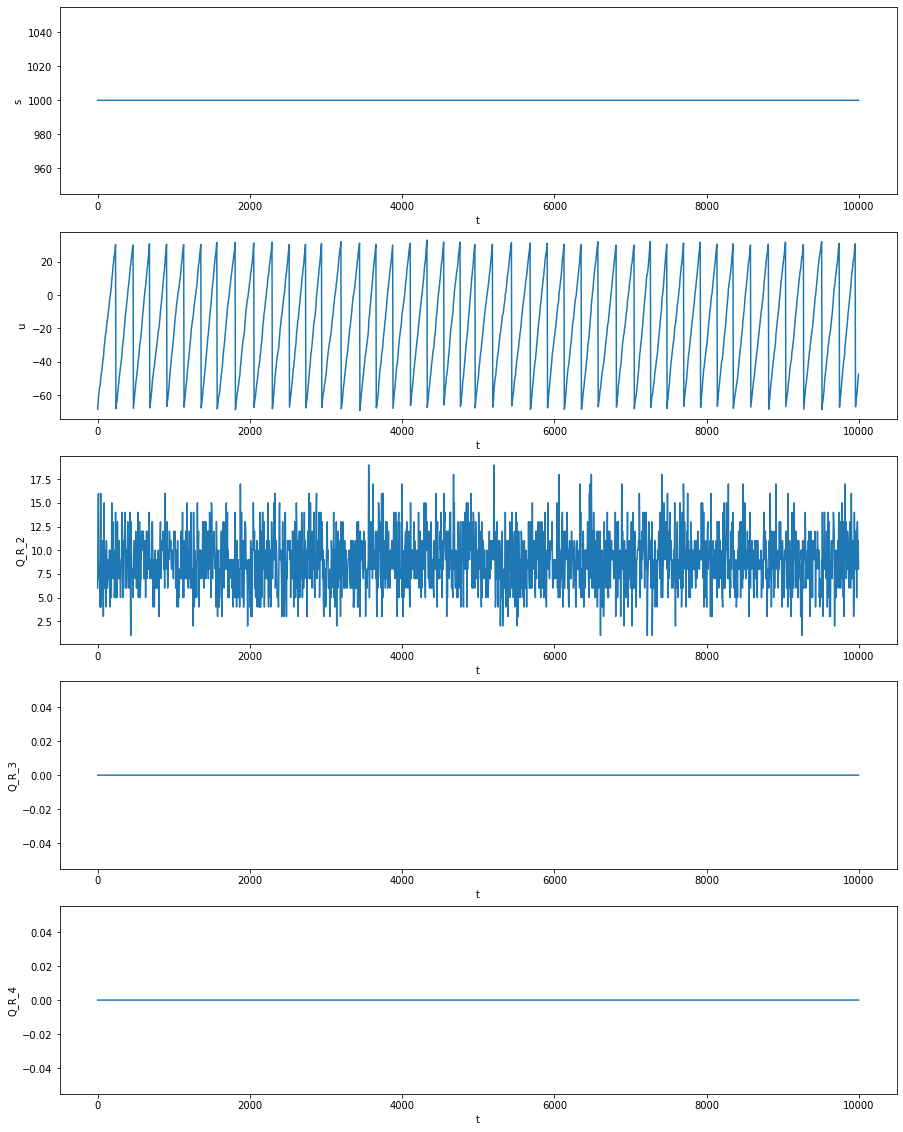

In [5]:
model = Model(
    v_rel=V_Deg + V_Uptake,
    xyz=(1500, 0, 0),
)
plot(model)

## Task 1

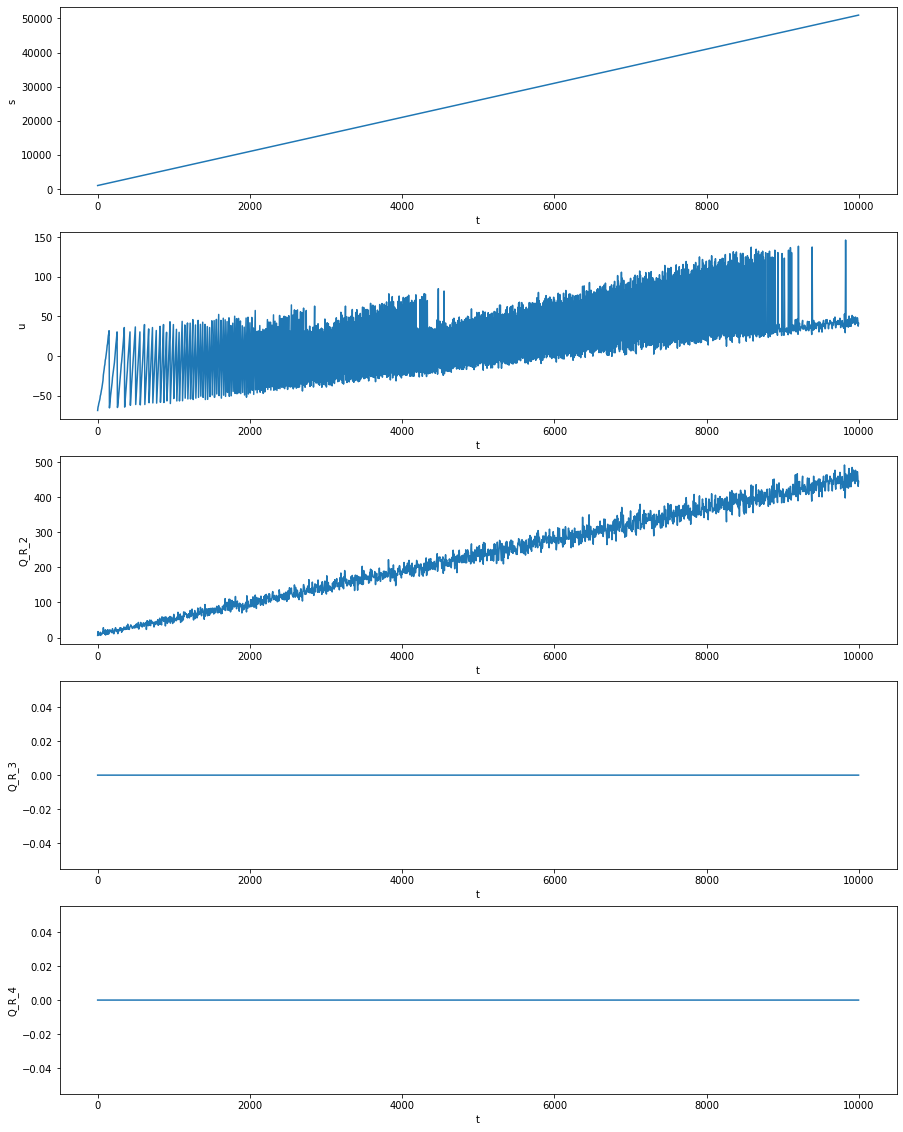

In [6]:
model = Model(
    v_rel=V_Deg + V_Uptake + 5,
    xyz=(1500, 0, 0),
)
assert model.max_seq_spikes >= 10
plot(model)

## Task 2

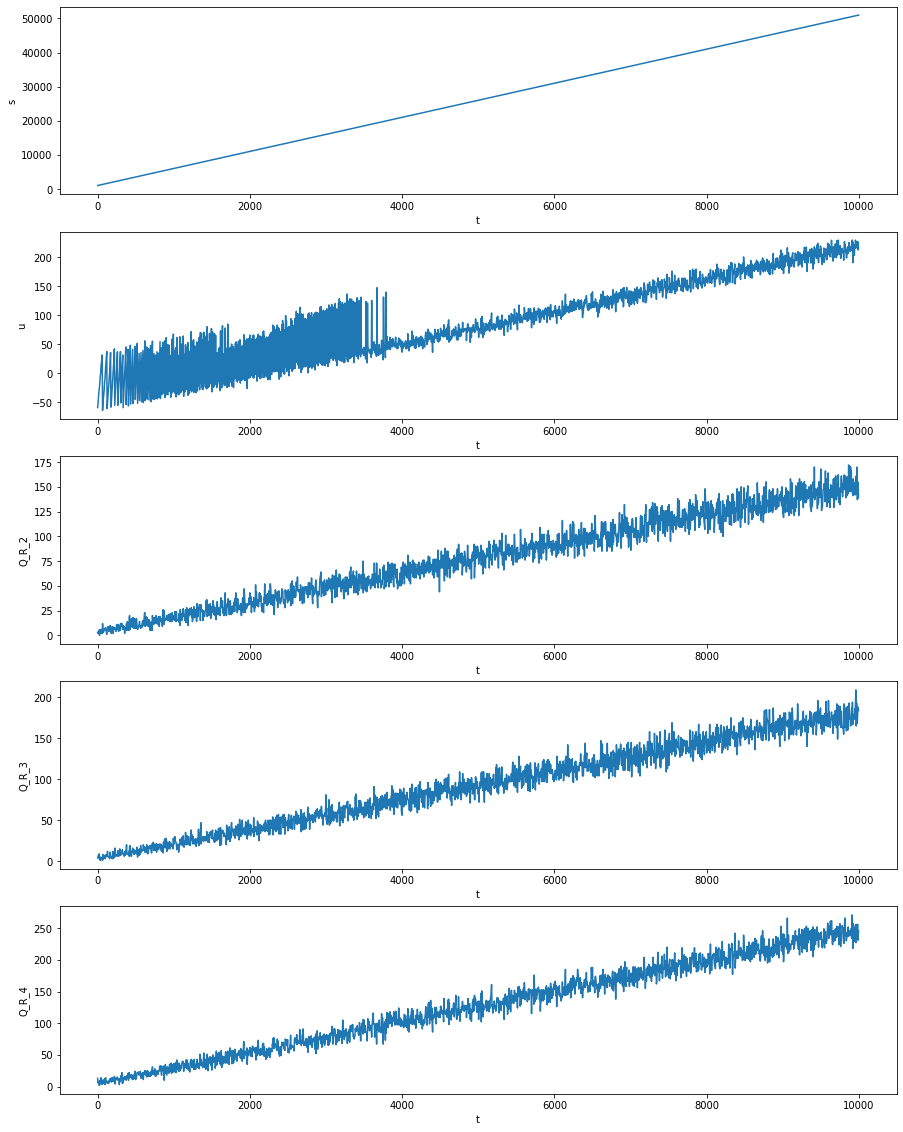

In [7]:
model = Model(
    v_rel=V_Deg + V_Uptake + 5,
    xyz=(500, 500, 500),
)
assert model.max_seq_spikes >= 50
plot(model)